<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/2.6_matrixDet/2.6_1_determinant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

---
# Matrix Determinant
---

In the real world when you are applying linear algebra to solve problems in data analysis or statistics or machine learning of course the computer implements a lot of the mechanistic details and what is much more important is that you understand the concepts and the uses and the limitations of various procedures and algorithms.

In [2]:

# Example matrix
A = np.array([[1, 2, 1],
              [3, 6, 3],
              [5, 10, 5]])

# Check rank
rank_A = np.linalg.matrix_rank(A)

# Linear dependence check
if rank_A < A.shape[1]:
    print("The columns of the matrix are linearly dependent.")
else:
    print("The columns of the matrix are linearly independent.")

The columns of the matrix are linearly dependent.


---
# Code Challenge: Determinant of small and large singular matricies
---

In [24]:
# generate a 2x2 matrix of integers with linear dependencies
# compute the rank
A = np.array([[1, 3], [1, 3]])
print(A), print(' ')
rank_1 = np.linalg.det(A)

# generate mxm matricies with linear dependencies,
# compute rank again
# small m and Large m

m = 90
A = np.random.randn(m,m)
A[:,0] = A[:,1]
rank_2 = np.linalg.det(A)

print(rank_1), print(' ')
print(rank_2)


[[1 3]
 [1 3]]
 
0.0
 
6.137500040129754e+50


In [25]:
B = np.array([[4,0,1],[6,5,-1],[8,-2,8]])
print(np.linalg.det(B))

99.99999999999996


---
# Determinant of 3x3 rank-deficient matrix
---

In [26]:
C = np.array([[4,0,1],[6,5,-1],[8,0,2]])
print(np.linalg.det(C))

0.0


---
# Determinant of 3x3 Identity matrix
---

In [27]:
D = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
print(np.linalg.det(D))

1.0


---
# Code Challenge: large matrix with row exchange
---

In [40]:
# generate a 6x6 matrix
# - compute determinant
# - swap one row, compute det() again
# - swap two rows, det() againe

A = np.random.randn(6,6)
print(f'Before row swap: {np.linalg.det(A)}')

As = A[[1,0,2,3,4,5],:]
print(f'After 1 row swap: {np.linalg.det(As)}')

As_swaped = A[[0,2,1,4,3,5],:]
print(f'After 2 rows swap: {np.linalg.det(As_swaped)}')

As_swaped = A[[1,0,3,2,4,5],:]
print(f'After 2 rows swap: {np.linalg.det(As_swaped)}')

As_swaped = A[[1,0,2,4,5,3],:]
print(f'After 3 rows swap: {np.linalg.det(As_swaped)}')


Before row swap: 53.27315683242591
After 1 row swap: -53.27315683242591
After 2 rows swap: 53.27315683242591
After 2 rows swap: 53.27315683242591
After 3 rows swap: -53.27315683242591


---
# Code Challenge: Determinant of shifted matricies
---

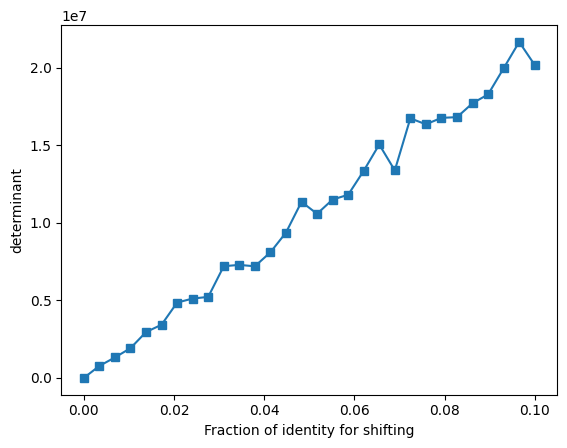

In [48]:
# generate a 20x20 random matrix
# impose a linear dependence
# "shift" the matrix (0->.1 times the identity matrix) (lambda)
# compute abs(determinant)
# repeat 1000 times, take average abs det
# plod det by lambda

# Create an array of 30 evenly spaced values between 0 and 0.1
lambdas = np.linspace(0, .1, 30)

# Initialize an array to store temporary determinant values for each iteration
tmp = np.zeros(1000)

# Initialize an array to store the average determinant for each lambda value
dets = np.zeros(len(lambdas))

# Loop over each lambda value
for deti in range(len(lambdas)):

  # Run 1000 iterations for each lambda value
  for i in range(1000):

    # Generate a 20x20 random matrix with elements drawn from a standard normal distribution
    M = np.random.randn(20, 20)

    # Impose a linear dependence by setting the first column equal to the second column
    M[:, 0] = M[:, 1]

    # Compute the absolute value of the determinant of the matrix after adding
    # a fraction (lambda) of the identity matrix to M
    tmp[i] = abs(np.linalg.det(M + lambdas[deti] * np.eye(20)))

  # Compute the average determinant over the 1000 iterations and store it
  dets[deti] = np.mean(tmp)

# Plot the average determinant against the lambda values
plt.plot(lambdas, dets, 's-')
plt.xlabel('Fraction of identity for shifting')
plt.ylabel('determinant')
plt.show()


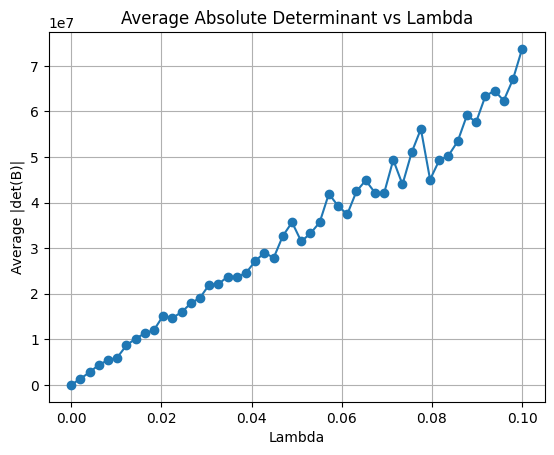

In [43]:

# Parameters
n = 20           # Size of the matrix (20x20)
num_trials = 1000  # Number of trials
lambdas = np.linspace(0, 0.1, 50)  # Range of lambda values to test

# Initialize array to store average determinants
avg_dets = np.zeros(len(lambdas))

# Loop over lambda values
for i, lam in enumerate(lambdas):
    dets = []

    for _ in range(num_trials):
        # Generate a random 20x20 matrix
        A = np.random.randn(n, n)

        # Impose linear dependence: make one column a linear combination of others
        A[:, -1] = np.sum(A[:, :-1], axis=1)

        # Shift the matrix by lam*Identity
        B = A + lam * np.eye(n)

        # Compute the determinant and take its absolute value
        det = np.abs(np.linalg.det(B))
        dets.append(det)

    # Compute the average determinant for this lambda
    avg_dets[i] = np.mean(dets)

# Plot the results
plt.plot(lambdas, avg_dets, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average |det(B)|')
plt.title('Average Absolute Determinant vs Lambda')
plt.grid(True)
plt.show()


---
# Code Challenge: Determinant of matrix product
---

In [50]:
# illustrate that det(AB) = det(A)*det(B)
#  1) for random 3x3 matricies
#  2) in a loop over random matrix sizes up to 40x40

A = np.random.randn(3,3)
B = np.random.randn(3,3)

AB = A@B # matrix multiplication

print(np.linalg.det(A), ' ', np.linalg.det(B), ' ', np.linalg.det(A)*np.linalg.det(B), ' ', np.linalg.det(AB))


-0.6189029375634657   0.5951458820811426   -0.36833753469881914   -0.36833753469881914


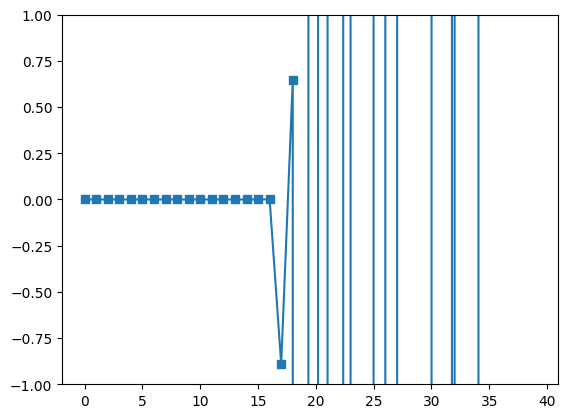

In [56]:
dets = np.zeros((40,2))

for k in range(40):
  A = np.random.randn(k,k)
  B = np.random.randn(k,k)

  AB = A@B

  dets[k,0] = np.linalg.det(A)*np.linalg.det(B)
  dets[k,1] = np.linalg.det(AB)

plt.plot(dets[:,0]-dets[:,1],'s-')
plt.ylim([-1,1])
plt.show()
